In [8]:
import numpy as np
from scipy.fft import *
from matplotlib import image as mimage
from matplotlib import pyplot as plt

In [5]:
cat = mimage.imread('datasets/cat-g9ca3b6a73_1920.jpg')

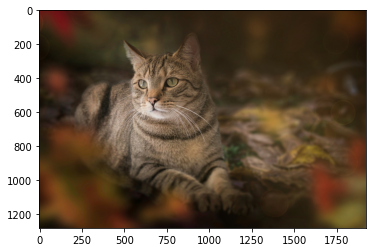

In [6]:
plt.imshow(cat)

In [19]:
catGrey = np.mean(cat,axis=2)

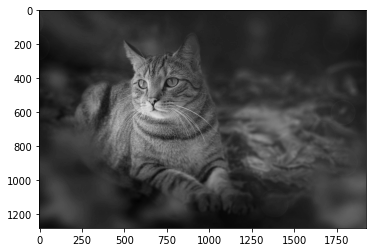

In [22]:
plt.imshow(catGrey,cmap='gray', vmin=0, vmax=255,)

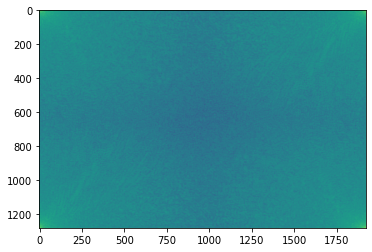

In [209]:
cgFour = fft2(catGrey)
plt.imshow(np.abs(cgFour),norm='log')

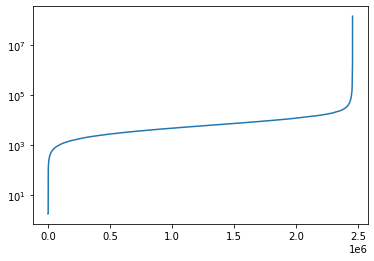

In [60]:
plt.semilogy(np.sort(np.abs(cgFour).flatten()),)

In [306]:
bound = np.percentile(np.abs(cgFour),99.999)
bound

4983069.181027233

In [307]:
cgFourTrans = cgFour.copy()

In [308]:
cgFourTrans[np.abs(cgFourTrans)<bound]=0
sum(np.abs(cgFourTrans.flatten()))/sum(np.abs(cgFour.flatten()))

0.018541340457641813

In [309]:
fCompCat = np.real(ifft2(cgFourTrans))

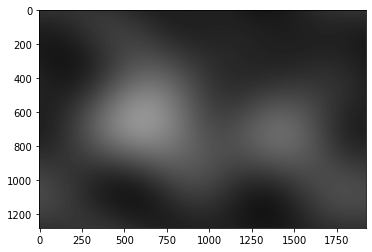

In [310]:
plt.imshow(fCompCat,cmap='gray', vmin=0, vmax=255,)

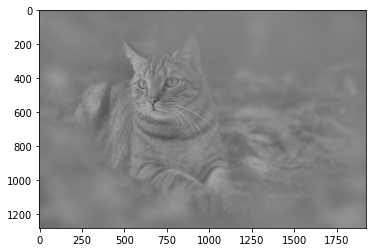

In [311]:
plt.imshow(catGrey-fCompCat,cmap='gray', vmin=-255, vmax=255,)

In [294]:
u,s,vt = np.linalg.svd(fCompCat,full_matrices=False)

In [295]:
u2,s2,vt2 = np.linalg.svd(catGrey,full_matrices=False)

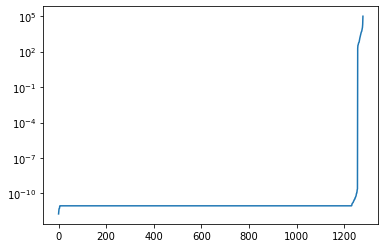

In [296]:
plt.semilogy(np.sort(s))


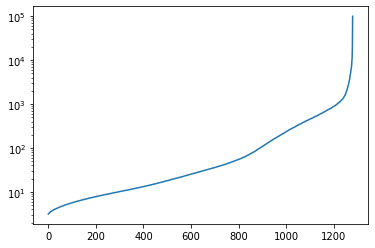

In [297]:
plt.semilogy(np.sort(s2))

In [298]:
np.sort(s)

array([1.82980809e-12, 3.34425509e-12, 4.97661486e-12, ...,
       1.13531372e+04, 2.11698171e+04, 9.96374790e+04])

In [299]:
np.mean(s < 1)

0.98203125

In [324]:
topN=5#np.size(s)*(1-np.mean(s < 1))

In [325]:
catSVD = u2[:,0:topN]@np.diag(s2[0:topN])@vt2[0:topN,:]

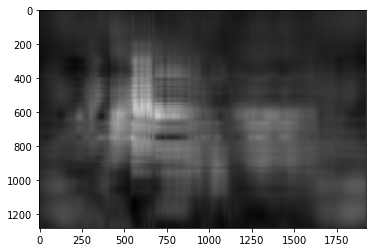

In [326]:
plt.imshow(catSVD,cmap='gray', vmin=0, vmax=255,)

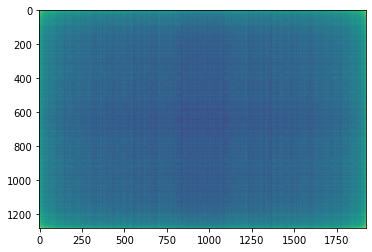

In [327]:
cgFourSVD = fft2(catSVD)
plt.imshow(np.abs(cgFourSVD),norm='log')

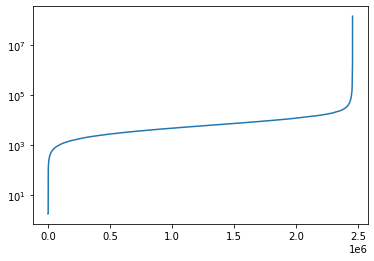

In [328]:
plt.semilogy(np.sort(np.abs(cgFour).flatten()))

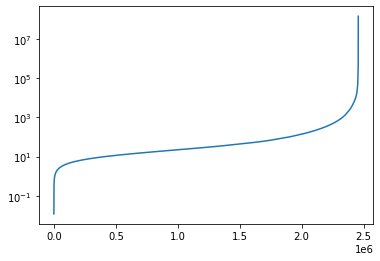

In [329]:
plt.semilogy(np.sort(np.abs(cgFourSVD).flatten()))

In [331]:
import pywt

In [332]:
coeffs = pywt.dwt2(catGrey, 'haar')

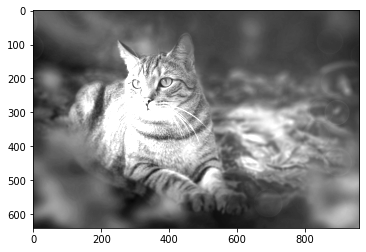

In [350]:
plt.imshow(coeffs[0],cmap='gray', vmin=0, vmax=255,)

In [359]:
u3,s3,vt3 = np.linalg.svd(coeffs[1][2],full_matrices=False)

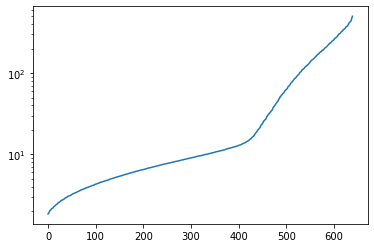

In [360]:
plt.semilogy(np.sort(s3))

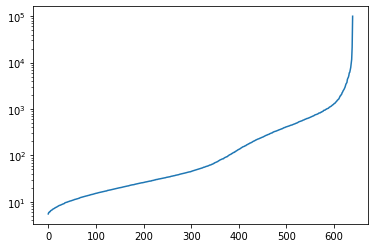

In [348]:
plt.semilogy(np.sort(s3))

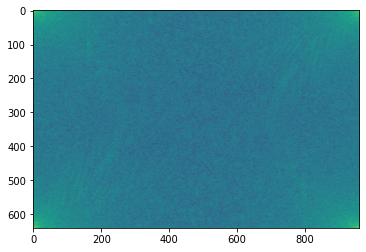

In [361]:
cgFourApprxSVD = fft2(coeffs[0])
plt.imshow(np.abs(cgFourApprxSVD),norm='log')

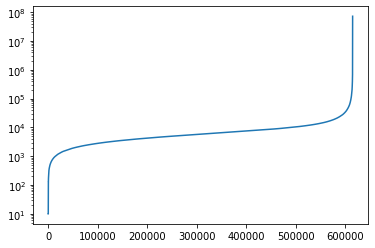

In [362]:
plt.semilogy(np.sort(np.abs(cgFourApprxSVD).flatten()))

ValueError: operands could not be broadcast together with shapes (2457600,) (614400,) 